# Data analysis

### Import necessary packages:

In [121]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

### Import data and check format:

In [122]:
df = pd.read_csv('csv_files/final_sorted_data.csv', index_col='listing_id')
df.drop(columns=['Unnamed: 0'], inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,Make & Model,location,City,Island,Age,age_bin,mileage,mileage_bin,engine_size,fuel,transmission,asking_price,seller_type,h_string,sub_title
listing_id,,,,,,,,,,,,,,,
1668261987118-3860157887-location,Ford Ranger,"Napier, Hawke's Bay",Other North Island,North Island,4,4 to 5 years old,"85,796km","50,000km to 100,000km",3200,Diesel,Automatic,53990,Dealer,"Dealer; 4 to 5 years old; 50,000km to 100,000k...",Ask us about Finance options on all vehicles!
1668261987726-3858370885-location,Ford Ranger,"Napier, Hawke's Bay",Other North Island,North Island,3,3 to 4 years old,"36,623km","20,000km to 50,000km",2000,Diesel,Automatic,69990,Dealer,"Dealer; 3 to 4 years old; 20,000km to 50,000km...",TONNEAU COVER / TOW BAR / DECK LINER
1668261996464-3856779556-location,Ford Everest,"Napier, Hawke's Bay",Other North Island,North Island,1,New,"12,380km","1,000km to 20,000km",2000,Diesel,Automatic,74990,Dealer,"Dealer; New; 1,000km to 20,000km; 2000; Diesel...",Ask us about Finance options on all vehicles!
1668262051669-3837242562-location,Ford Ecosport,"Napier, Hawke's Bay",Other North Island,North Island,6,6 to 7 years old,"33,650km","20,000km to 50,000km",1500,Petrol,Automatic,15990,Dealer,"Dealer; 6 to 7 years old; 20,000km to 50,000km...",Franchise Backed-Delivery NZ Wide-Great Servi...
1668262068407-3820002936-location,Ford Courier,"Napier, Hawke's Bay",Other North Island,North Island,23,Over 20 years,"327,786km","250,000km to 500,000km",2500,Diesel,Manual,7250,Private seller,"Private seller; Over 20 years; 250,000km to 50...",2000 Ford Courier xlx


### Examine data:

#### Count rows and columns

In [123]:
df.shape

(35908, 15)

#### Count unique values in each column heading:

In [124]:
df.nunique()

Make & Model      443
location          192
City                6
Island              2
Age                92
age_bin            12
mileage         21284
mileage_bin         9
engine_size        69
fuel                5
transmission        3
asking_price     4105
seller_type         2
h_string         3807
sub_title        9029
dtype: int64

#### View most popular Make/Model combination listings:

In [125]:
df['Make & Model'].value_counts()

Toyota Aqua               2385
Ford Ranger               1598
Toyota Hilux              1564
Toyota Corolla            1519
Toyota Prius              1395
                          ... 
Toyota CAMRY                 1
Ford 1961 Ford prefect       1
Toyota Gaia                  1
Ford Torino                  1
Nissan President             1
Name: Make & Model, Length: 443, dtype: int64

In [126]:
df['City'].value_counts()

Auckland              13862
Other North Island     6164
Christchurch           5837
Other South Island     4044
Hamilton               3308
Wellington             2693
Name: City, dtype: int64

#### Check most popular comparable models by counting the 'h_string' - identify the most representative listings to analyse:

- Toyota Aqua and Toyota Prius both have bins with 200+ sales nationwide, per the results below.

- The other models do not appear to have a sufficient spread of listings to make a reliable comparison between locations Ford Ranger (largest bin 54 listings), Toyota Hilux (largest bin 74 listings), Toyota Corolla (largest bin 78 listings)

In [127]:
filt = df['Make & Model'] == 'Toyota Aqua'
acqua_df = df[filt]
acqua_df['h_string'].value_counts()

Dealer; 10 to 15 years old; 50,000km to 100,000km; 1500; Hybrid; Automatic                    308
Dealer; 10 to 15 years old; 100,000km to 250,000km; 1500; Hybrid; Automatic                   305
Dealer; 6 to 7 years old; 50,000km to 100,000km; 1500; Hybrid; Automatic                      241
Dealer; 6 to 7 years old; 100,000km to 250,000km; 1500; Hybrid; Automatic                     176
Dealer; 8 to 9 years old; 100,000km to 250,000km; 1500; Hybrid; Automatic                     146
                                                                                             ... 
Private seller; 10 to 15 years old; 50,000km to 100,000km; 0; Not available; Not available      1
Private seller; 10 to 15 years old; 50,000km to 100,000km; 0; Hybrid; Automatic                 1
Dealer; 6 to 7 years old; 20,000km to 50,000km; 15000; Hybrid; Automatic                        1
Private seller; 10 to 15 years old; 20,000km to 50,000km; 1500; Hybrid; Automatic               1
Dealer; 10 to 15 yea

In [128]:
filt = df['Make & Model'] == 'Toyota Prius'
acqua_df = df[filt]
acqua_df['h_string'].value_counts()

Dealer; 10 to 15 years old; 100,000km to 250,000km; 1800; Hybrid; Automatic      306
Dealer; 10 to 15 years old; 50,000km to 100,000km; 1800; Hybrid; Automatic       241
Dealer; 8 to 9 years old; 50,000km to 100,000km; 1800; Hybrid; Automatic          82
Dealer; 6 to 7 years old; 50,000km to 100,000km; 1800; Hybrid; Automatic          70
Dealer; 8 to 9 years old; 100,000km to 250,000km; 1800; Hybrid; Automatic         57
                                                                                ... 
Private seller; 6 to 7 years old; 50,000km to 100,000km; 0; Hybrid; Automatic      1
Dealer; 7 to 8 years old; 50,000km to 100,000km; 1800; Hybrid; Not available       1
Dealer; 7 to 8 years old; 50,000km to 100,000km; 0; Hybrid; Automatic              1
Dealer; 15 to 20 years old; 20,000km to 50,000km; 1500; Hybrid; Automatic          1
Dealer; 6 to 7 years old; 20,000km to 50,000km; 0; Electric; Automatic             1
Name: h_string, Length: 128, dtype: int64

In [129]:
# Set column widths 
x_indexes = np.arange(1)
width = 0.5

#### Chart average listing price of top selling make/model combinations by top 'bins' for each location:


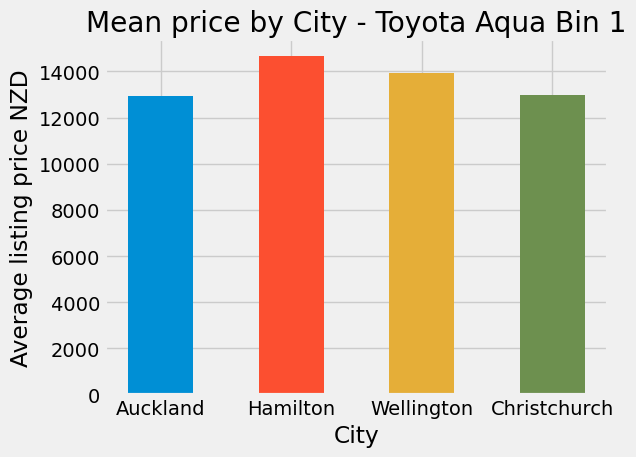

In [130]:
Aqua1 = 'Dealer; 10 to 15 years old; 50,000km to 100,000km; 1500; Hybrid; Automatic'

# Bin 1 Auck:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Auckland') &
        (df['h_string'] == Aqua1))

bin1_auck = df[filt]
bin1_auck = bin1_auck['asking_price'].mean()

# Bin 1 Hammy:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Hamilton') &
        (df['h_string'] == Aqua1))

bin1_hammy = df[filt]
bin1_hammy = bin1_hammy['asking_price'].mean()

# Bin 1 Welly:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Wellington') &
        (df['h_string'] == Aqua1))

bin1_welly = df[filt]
bin1_welly = bin1_welly['asking_price'].mean()

# Bin 1 ChCh:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Christchurch') &
        (df['h_string'] == Aqua1))

bin1_chch = df[filt]
bin1_chch = bin1_chch['asking_price'].mean()

# Plot charts
plt.style.use("fivethirtyeight")
plt.bar("Auckland", bin1_auck, width=width, label="Auckland")
plt.bar("Hamilton", bin1_hammy,  width=width,label="Hamilton")
plt.bar("Wellington", bin1_welly, width=width, label="Wellington")
plt.bar("Christchurch", bin1_chch, width=width, label="Christchurch")

# Set chart labels:
plt.xlabel('City')
plt.ylabel('Average listing price NZD')
plt.title("Mean price by City - Toyota Aqua Bin 1")

# Save chart
plt.tight_layout()
plt.savefig('charts/bin_1.png', bbox_inches=None)

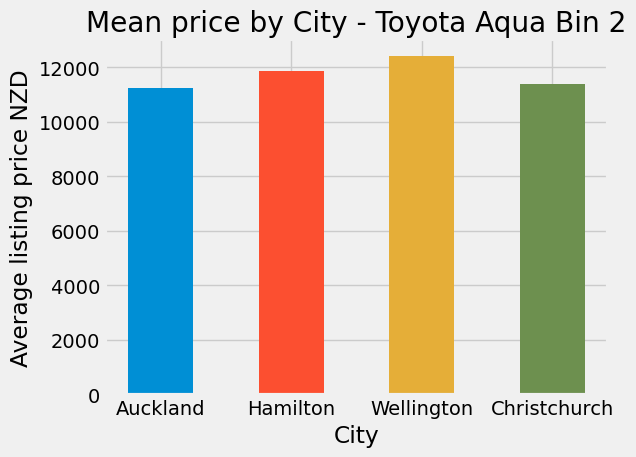

In [131]:
Aqua2 = 'Dealer; 10 to 15 years old; 100,000km to 250,000km; 1500; Hybrid; Automatic'

# Bin 2 Auck:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Auckland') &
        (df['h_string'] == Aqua2))

bin2_auck = df[filt]
bin2_auck = bin2_auck['asking_price'].mean()

# Bin 2 Hammy:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Hamilton') &
        (df['h_string'] == Aqua2))

bin2_hammy = df[filt]
bin2_hammy = bin2_hammy['asking_price'].mean()

# Bin 2 Welly:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Wellington') &
        (df['h_string'] == Aqua2))

bin2_welly = df[filt]
bin2_welly = bin2_welly['asking_price'].mean()

# Bin 2 ChCh:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Christchurch') &
        (df['h_string'] == Aqua2))

bin2_chch = df[filt]
bin2_chch = bin2_chch['asking_price'].mean()

# Plot charts
plt.style.use("fivethirtyeight")
plt.bar("Auckland", bin2_auck, width=width, label="Auckland")
plt.bar("Hamilton", bin2_hammy,  width=width,label="Hamilton")
plt.bar("Wellington", bin2_welly, width=width, label="Wellington")
plt.bar("Christchurch", bin2_chch, width=width, label="Christchurch")

# Set chart labels:
plt.xlabel('City')
plt.ylabel('Average listing price NZD')
plt.title("Mean price by City - Toyota Aqua Bin 2")

# Save chart
plt.tight_layout()
plt.savefig('charts/bin_2.png')

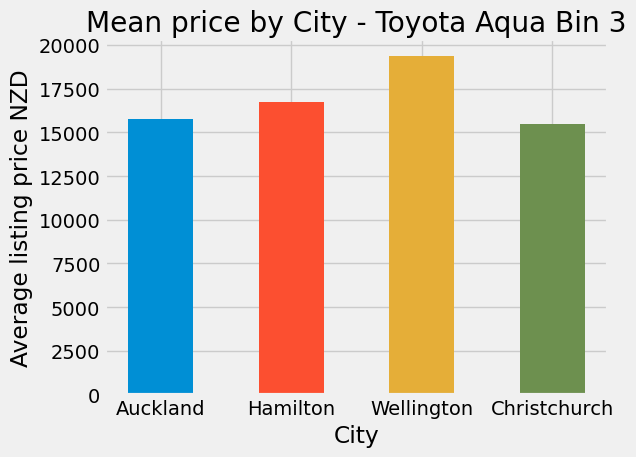

In [132]:
Aqua3 = 'Dealer; 6 to 7 years old; 50,000km to 100,000km; 1500; Hybrid; Automatic'

# Bin 3 Auck:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Auckland') &
        (df['h_string'] == Aqua3))

bin3_auck = df[filt]
bin3_auck = bin3_auck['asking_price'].mean()

# Bin 3 Hammy:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Hamilton') &
        (df['h_string'] == Aqua3))

bin3_hammy = df[filt]
bin3_hammy = bin3_hammy['asking_price'].mean()

# Bin 3 Welly:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Wellington') &
        (df['h_string'] == Aqua3))

bin3_welly = df[filt]
bin3_welly = bin3_welly['asking_price'].mean()

# Bin 3 ChCh:
filt = ((df['Make & Model'] == 'Toyota Aqua') &
        (df['City'] == 'Christchurch') &
        (df['h_string'] == Aqua3))

bin3_chch = df[filt]
bin3_chch = bin3_chch['asking_price'].mean()

# Plot charts
plt.style.use("fivethirtyeight")
plt.bar("Auckland", bin3_auck, width=width, label="Auckland")
plt.bar("Hamilton", bin3_hammy,  width=width,label="Hamilton")
plt.bar("Wellington", bin3_welly, width=width, label="Wellington")
plt.bar("Christchurch", bin3_chch, width=width, label="Christchurch")

# Set chart labels:
plt.xlabel('City')
plt.ylabel('Average listing price NZD')
plt.title("Mean price by City - Toyota Aqua Bin 3")

# Save chart
plt.tight_layout()
plt.savefig('charts/bin_3.png')

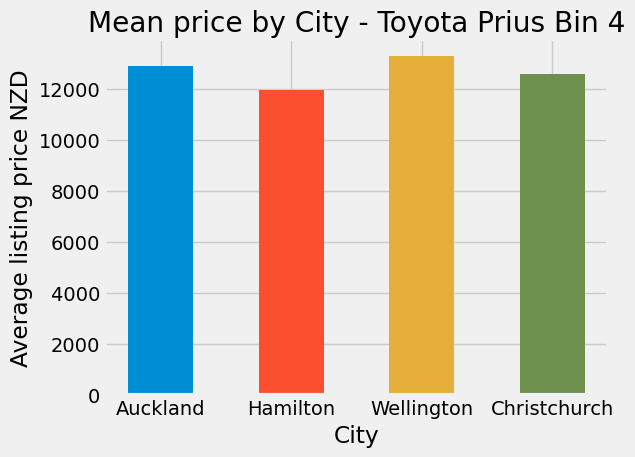

In [133]:
Prius1 = 'Dealer; 10 to 15 years old; 100,000km to 250,000km; 1800; Hybrid; Automatic'

# Bin 4 Auck:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Auckland') &
        (df['h_string'] == Prius1))

bin4_auck = df[filt]
bin4_auck = bin4_auck['asking_price'].mean()

# Bin 4 Hammy:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Hamilton') &
        (df['h_string'] == Prius1))

bin4_hammy = df[filt]
bin4_hammy = bin4_hammy['asking_price'].mean()

# Bin 4 Welly:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Wellington') &
        (df['h_string'] == Prius1))

bin4_welly = df[filt]
bin4_welly = bin4_welly['asking_price'].mean()

# Bin 4 ChCh:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Christchurch') &
        (df['h_string'] == Prius1))

bin4_chch = df[filt]
bin4_chch = bin4_chch['asking_price'].mean()

# Plot charts
plt.style.use("fivethirtyeight")
plt.bar("Auckland", bin4_auck, width=width, label="Auckland")
plt.bar("Hamilton", bin4_hammy,  width=width,label="Hamilton")
plt.bar("Wellington", bin4_welly, width=width, label="Wellington")
plt.bar("Christchurch", bin4_chch, width=width, label="Christchurch")

# Set chart labels:
plt.xlabel('City')
plt.ylabel('Average listing price NZD')
plt.title("Mean price by City - Toyota Prius Bin 4")

# Save chart
plt.tight_layout()
plt.savefig('charts/bin_4.png')

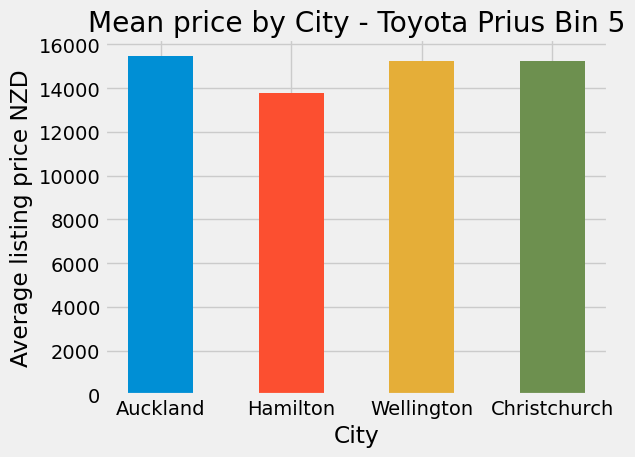

In [134]:
Prius2 = 'Dealer; 10 to 15 years old; 50,000km to 100,000km; 1800; Hybrid; Automatic'

# Bin 5 Auck:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Auckland') &
        (df['h_string'] == Prius2))

bin5_auck = df[filt]
bin5_auck = bin5_auck['asking_price'].mean()

# Bin 5 Hammy:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Hamilton') &
        (df['h_string'] == Prius2))

bin5_hammy = df[filt]
bin5_hammy = bin5_hammy['asking_price'].mean()

# Bin 5 Welly:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Wellington') &
        (df['h_string'] == Prius2))

bin5_welly = df[filt]
bin5_welly = bin5_welly['asking_price'].mean()

# Bin 5 ChCh:
filt = ((df['Make & Model'] == 'Toyota Prius') &
        (df['City'] == 'Wellington') &
        (df['h_string'] == Prius2))

bin5_chch = df[filt]
bin5_chch = bin5_chch['asking_price'].mean()

# Plot charts
plt.style.use("fivethirtyeight")
plt.bar("Auckland", bin5_auck, width=width, label="Auckland")
plt.bar("Hamilton", bin5_hammy,  width=width,label="Hamilton")
plt.bar("Wellington", bin5_welly, width=width, label="Wellington")
plt.bar("Christchurch", bin5_chch, width=width, label="Christchurch")

# Set chart labels:
plt.xlabel('City')
plt.ylabel('Average listing price NZD')
plt.title("Mean price by City - Toyota Prius Bin 5")

# Save chart
plt.tight_layout()
plt.savefig('charts/bin_5.png')

#### Conclusion:

The most common models in the country have between 1,500 and 2,400 listings, however there are only six groups of homogenous listings where the listings share similar characteristics (identified by the h_string) with over 200 listings nationwide. These form the focus of the analysis.

It has been assumed to this point that all the data collected could have an impact on price (e.g a manual gearbox will be priced differently to an automatic one, or that different fuel types will mean different listings are not directly comparable.

To sense check this assumption, and see if we can widen some of the categories, we will look at a heatmap to show the impact of each individual characteristic.

### Look at correlation to view impact of different characteristics on price:

In [135]:
# Create dataframes with filters for most popular models:
filt = df['Make & Model'] == 'Toyota Aqua'
acqua_df = df[filt]

filt = df['Make & Model'] == 'Ford Ranger'
ranger_df = df[filt]

In [136]:
# Remove non-numerical values:
ranger_df = ranger_df.drop(columns=['Make & Model', 
                                    'location', 
                                    'Island', 
                                    'City', 
                                    'age_bin', 
                                    'mileage_bin', 
                                    'h_string', 
                                    'sub_title'])

acqua_df = acqua_df.drop(columns=['Make & Model', 
                                    'location', 
                                    'Island', 
                                    'City', 
                                    'age_bin', 
                                    'mileage_bin', 
                                    'h_string', 
                                    'sub_title'])

In [137]:
# Convert mileage/km to a numerical value:
ranger_df['mileage'] = ranger_df['mileage'].str.replace("km", "")
ranger_df['mileage'] = ranger_df['mileage'].str.replace(",", "")
ranger_df['mileage'] = ranger_df['mileage'].str.replace("mileage missing", "")

acqua_df['mileage'] = acqua_df['mileage'].str.replace("km", "")
acqua_df['mileage'] = acqua_df['mileage'].str.replace(",", "")
acqua_df['mileage'] = acqua_df['mileage'].str.replace("mileage missing", "")

# Overwrite empty values:
ranger_df.loc['1668262763787-3774402872-location', 'mileage'] = '0'
ranger_df.loc['1668262795782-3732540866-location', 'mileage'] = '0'
ranger_df.loc['1668262789325-3752398185-location', 'mileage'] = '0'
ranger_df.loc['1668262051871-3832980818-location', 'mileage'] = '0'

# Convert to float
ranger_df['mileage'] = ranger_df['mileage'].astype(float)
acqua_df['mileage'] = acqua_df['mileage'].astype(float)

In [138]:
# Change fuel column to numerical values:
ranger_df['fuel'] = ranger_df['fuel'].str.replace("Diesel", "0")
ranger_df['fuel'] = ranger_df['fuel'].str.replace("Not available", "0")
ranger_df['fuel'] = ranger_df['fuel'].str.replace("Petrol", "1")

acqua_df['fuel'] = acqua_df['fuel'].str.replace("Diesel", "0")
acqua_df['fuel'] = acqua_df['fuel'].str.replace("Not available", "0")
acqua_df['fuel'] = acqua_df['fuel'].str.replace("Petrol", "1")
acqua_df['fuel'] = acqua_df['fuel'].str.replace("Hybrid", "2")

# Convert to float
ranger_df['fuel'] = ranger_df['fuel'].astype(float)
acqua_df['fuel'] = acqua_df['fuel'].astype(float)

In [139]:
# Change transmissiom column to numerical values:
ranger_df['transmission'] = ranger_df['transmission'].str.replace("Automatic", "0")
ranger_df['transmission'] = ranger_df['transmission'].str.replace("Manual", "1")
ranger_df['transmission'] = ranger_df['transmission'].str.replace("Not available", "0")

acqua_df['transmission'] = acqua_df['transmission'].str.replace("Automatic", "0")
acqua_df['transmission'] = acqua_df['transmission'].str.replace("Manual", "1")
acqua_df['transmission'] = acqua_df['transmission'].str.replace("Not available", "0")

# Convert to float
ranger_df['transmission'] = ranger_df['transmission'].astype(float)
acqua_df['transmission'] = acqua_df['transmission'].astype(float)

In [140]:
# Change seller type to numerical values:
ranger_df['seller_type'] = ranger_df['seller_type'].str.replace("Dealer", "1")
ranger_df['seller_type'] = ranger_df['seller_type'].str.replace("Private seller", "0")

acqua_df['seller_type'] = acqua_df['seller_type'].str.replace("Dealer", "1")
acqua_df['seller_type'] = acqua_df['seller_type'].str.replace("Private seller", "0")

# Convert to float
ranger_df['seller_type'] = ranger_df['seller_type'].astype(float)
acqua_df['seller_type'] = acqua_df['seller_type'].astype(float)

In [141]:
acqua_df.head()

,Age,mileage,engine_size,fuel,transmission,asking_price,seller_type
listing_id,,,,,,,
1668268292116-3824938870-location,10,35491.0,1500,2.0,0.0,16990,1.0
1668269093130-3820483512-location,6,69970.0,1500,2.0,0.0,17995,1.0
1668269376077-3749890483-location,6,51780.0,1500,2.0,0.0,17995,1.0
1668270082020-3773120838-location,11,113653.0,1500,2.0,0.0,13950,1.0
1668270379012-3607175587-location,6,18258.0,1500,2.0,0.0,19950,1.0


In [142]:
# Reset index:
ranger_df.reset_index(drop=True, inplace=True)
acqua_df.reset_index(drop=True, inplace=True)

In [143]:
ranger_df.corr()

,Age,mileage,engine_size,fuel,transmission,asking_price,seller_type
Age,1.000000,0.742581,0.427141,0.058521,0.556496,-0.123503,-0.219958
mileage,0.742581,1.000000,0.378096,-0.036535,0.507776,-0.116862,-0.149507
engine_size,0.427141,0.378096,1.000000,0.061983,0.180656,-0.121192,-0.096388
fuel,0.058521,-0.036535,0.061983,1.000000,-0.015675,0.000946,-0.030802
transmission,0.556496,0.507776,0.180656,-0.015675,1.000000,-0.056841,-0.112316
asking_price,-0.123503,-0.116862,-0.121192,0.000946,-0.056841,1.000000,0.049938
seller_type,-0.219958,-0.149507,-0.096388,-0.030802,-0.112316,0.049938,1.000000


In [144]:
acqua_df.corr()

,Age,mileage,engine_size,fuel,transmission,asking_price,seller_type
Age,1.000000,0.160793,-0.031408,-0.029486,NaN,-0.475124,-0.028247
mileage,0.160793,1.000000,-0.045270,-0.049673,NaN,-0.539160,-0.084252
engine_size,-0.031408,-0.045270,1.000000,0.040605,NaN,-0.055569,0.062955
fuel,-0.029486,-0.049673,0.040605,1.000000,NaN,0.014828,-0.027037
transmission,NaN,NaN,NaN,NaN,NaN,NaN,NaN
asking_price,-0.475124,-0.539160,-0.055569,0.014828,NaN,1.000000,0.158279
seller_type,-0.028247,-0.084252,0.062955,-0.027037,NaN,0.158279,1.000000
